# Notebook for Project 1: EDA
Author: Sandra Schwegmann, Sandra.Schwegmann@gmx.net

In [273]:
# import all necassary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime

%matplotlib inline
plt.style.use('seaborn')
np.random.seed(42)

In [274]:
#load data
house_data = pd.read_csv('King_County_House_prices_dataset.csv')

In [275]:
# Variable decription einfügen wie unten zu sehen

## Variable description 
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Type of data and data conversions

In [276]:
# Getting a first idea of the data
print('Number of rows and columns data: ',house_data.shape)
house_data.head(3)

Number of rows and columns data:  (21597, 21)


id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  

[3 rows x 21 columns]

In [277]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [278]:
house_data.sqft_basement.head(10)

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6         ?
7       0.0
8     730.0
9       0.0
Name: sqft_basement, dtype: object

In [279]:
# replace ? by NaN in house_data.sqft_basement
house_data.sqft_basement[house_data.sqft_basement=='?'] = np.nan

# create a new column for a numeric sqft_basement and converting from type object
# to type float

house_data['sqft_basement2'] = pd.to_numeric(house_data.sqft_basement)#.fillna(-1, downcast='infer')
#https://stackoverflow.com/questions/25952790/convert-pandas-series-from-dtype-object-to-float-and-errors-to-nans
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id                21597 non-null int64
date              21597 non-null object
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_living       21597 non-null int64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
waterfront        19221 non-null float64
view              21534 non-null float64
condition         21597 non-null int64
grade             21597 non-null int64
sqft_above        21597 non-null int64
sqft_basement     21143 non-null object
yr_built          21597 non-null int64
yr_renovated      17755 non-null float64
zipcode           21597 non-null int64
lat               21597 non-null float64
long              21597 non-null float64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
sqft_basement2    21143 non-null float64
dtypes: float

/Users/sandra/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [280]:
house_data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...        1180            0.0   
1      7242     2.0         0.0   0.0  ...        2170          400.0   
2     10000     1.0         0.0   0.0  ...         770            0.0   
3      5000     1.0         0.0   0.0  ...        1050          910.0   
4      8080     1.0         0.0   0.0  ...        1680            0.0   

   yr_built yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955          0.0    98178  47.5112 -122.257           1340   
1      1951       1991.0    98125  47.7210 -122.319           1690   
2      1933          NaN    98028  47.7379 -122.233           2720   
3      1965          0.0    98136  47.5208 -122.393           1360   
4      1987          0.0    98074  47.6168 -122.045           1800   

   sqft_lot15  sqft_basement2  
0        5650             0.0  
1        7639           400.0  
2        8062             0.0  
3        5000           910.0  
4        7503             0.0  

[5 rows x 22 columns]

In [281]:
# convert date into pandas date-format
house_data['formatted_date'] = pd.to_datetime(house_data.date, format='%m/%d/%Y')

#create a counter for days since 01/05/2014
basedate  = pd.Timestamp('2014-05-01')
house_data['dateIndex'] = (house_data['formatted_date']-basedate).dt.days
house_data[['formatted_date','dateIndex']].head()

formatted_date  dateIndex
0     2014-10-13        165
1     2014-12-09        222
2     2015-02-25        300
3     2014-12-09        222
4     2015-02-18        293

## Missing data treatment

In [282]:
missing = pd.DataFrame(house_data.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/house_data.shape[0]*100,1)
missing[missing.Number!=0]

Number  Percentage
waterfront        2376        11.0
view                63         0.3
sqft_basement      454         2.1
yr_renovated      3842        17.8
sqft_basement2     454         2.1

**Out of 27 variables 4 have missing values**
- waterfront has 2376 null values or 11 per cent of instances
- view has 63 instances of 0.3 percent missing values
- yr_renovated has 3842 missing values which is equal to 17.8 percent
- sqft_basement=sqft_basement2 has 454 instances or 2.1 percent of missing values

### Renovation year

Year of renovation has to kinds of missing values
- NaN
- 0

In [283]:
#clean up yr_renovated, first set NaN to 0.0
house_data['yr_renovated_rpl_0'] = house_data.yr_renovated
house_data['yr_renovated_rpl_0'].fillna(0,inplace=True)

# then set 0.0 to yr_built as I assume that no renovation took place
# alternatively it should be tested weather categorizing data into 
# recentliy, unknown, never, not recently makes sense

house_data.yr_renovated_rpl_0[house_data.yr_renovated_rpl_0 == 0.0] \
    = house_data.yr_built[house_data.yr_renovated_rpl_0 == 0.0]
house_data[['yr_renovated_rpl_0','yr_renovated']].head()

/Users/sandra/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


yr_renovated_rpl_0  yr_renovated
0              1955.0           0.0
1              1991.0        1991.0
2              1933.0           NaN
3              1965.0           0.0
4              1987.0           0.0

In [284]:
house_data[['yr_renovated_rpl_0','yr_renovated']].describe()

yr_renovated_rpl_0  yr_renovated
count        21597.000000  17755.000000
mean          1972.945131     83.636778
std             28.945393    399.946414
min           1900.000000      0.000000
25%           1954.000000      0.000000
50%           1977.000000      0.000000
75%           1999.000000      0.000000
max           2015.000000   2015.000000

### Basement size

In [285]:
house_data[['sqft_basement','sqft_above','sqft_living']].head(10)

sqft_basement  sqft_above  sqft_living
0           0.0        1180         1180
1         400.0        2170         2570
2           0.0         770          770
3         910.0        1050         1960
4           0.0        1680         1680
5        1530.0        3890         5420
6           NaN        1715         1715
7           0.0        1060         1060
8         730.0        1050         1780
9           0.0        1890         1890

In [286]:
# removing missing data in sqft_basement2
house_data.sqft_basement2 = house_data.sqft_living - house_data.sqft_above
house_data[['sqft_basement','sqft_basement2','sqft_above','sqft_living']].head(7)

sqft_basement  sqft_basement2  sqft_above  sqft_living
0           0.0               0        1180         1180
1         400.0             400        2170         2570
2           0.0               0         770          770
3         910.0             910        1050         1960
4           0.0               0        1680         1680
5        1530.0            1530        3890         5420
6           NaN               0        1715         1715

### View and Waterfront

**No solution found so far**
- no obvious relationship to other variables -> hard to estimate 

In [295]:
# was mit waterfront und view machen???
# Categorical variables, untersuche ich später
# ggf aus Pos/ZipCode Daten Waterfront ermitteln und daraus view ableiten
# ist aber sehr vage...

## Basic statistics

In [287]:
house_data.describe().round(2)

id       price  bedrooms  bathrooms  sqft_living    sqft_lot  \
count  2.159700e+04    21597.00  21597.00   21597.00     21597.00    21597.00   
mean   4.580474e+09   540296.57      3.37       2.12      2080.32    15099.41   
std    2.876736e+09   367368.14      0.93       0.77       918.11    41412.64   
min    1.000102e+06    78000.00      1.00       0.50       370.00      520.00   
25%    2.123049e+09   322000.00      3.00       1.75      1430.00     5040.00   
50%    3.904930e+09   450000.00      3.00       2.25      1910.00     7618.00   
75%    7.308900e+09   645000.00      4.00       2.50      2550.00    10685.00   
max    9.900000e+09  7700000.00     33.00       8.00     13540.00  1651359.00   

         floors  waterfront      view  condition  ...  yr_built  yr_renovated  \
count  21597.00    19221.00  21534.00   21597.00  ...  21597.00      17755.00   
mean       1.49        0.01      0.23       3.41  ...   1971.00         83.64   
std        0.54        0.09      0.77       0.65  ...     29.38        399.95   
min        1.00        0.00      0.00       1.00  ...   1900.00          0.00   
25%        1.00        0.00      0.00       3.00  ...   1951.00          0.00   
50%        1.50        0.00      0.00       3.00  ...   1975.00          0.00   
75%        2.00        0.00      0.00       4.00  ...   1997.00          0.00   
max        3.50        1.00      4.00       5.00  ...   2015.00       2015.00   

        zipcode       lat      long  sqft_living15  sqft_lot15  \
count  21597.00  21597.00  21597.00       21597.00    21597.00   
mean   98077.95     47.56   -122.21        1986.62    12758.28   
std       53.51      0.14      0.14         685.23    27274.44   
min    98001.00     47.16   -122.52         399.00      651.00   
25%    98033.00     47.47   -122.33        1490.00     5100.00   
50%    98065.00     47.57   -122.23        1840.00     7620.00   
75%    98118.00     47.68   -122.12        2360.00    10083.00   
max    98199.00     47.78   -121.32        6210.00   871200.00   

       sqft_basement2  dateIndex  yr_renovated_rpl_0  
count        21597.00   21597.00            21597.00  
mean           291.73     181.18             1972.95  
std            442.67     113.06               28.95  
min              0.00       1.00             1900.00  
25%              0.00      82.00             1954.00  
50%              0.00     168.00             1977.00  
75%            560.00     292.00             1999.00  
max           4820.00     391.00             2015.00  

[8 rows x 22 columns]

## Correlation

In [288]:
continuous_var = list(house_data.select_dtypes(
                        ['int64','float64']).columns.values)
continuous_var.remove('id')


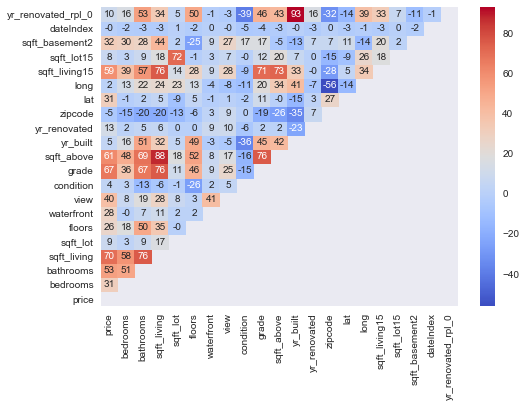

In [290]:
X_dum=pd.get_dummies(house_data[continuous_var].copy())
mask = np.triu(X_dum.corr())
ax = sns.heatmap(round(X_dum.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm')
ax.set_ylim((0,21))
plt.savefig('figures/correlogram.png')

In [299]:
house_data[['sqft_living','grade','sqft_above','sqft_basement2','sqft_living15',\
            'bathrooms','view','sqft_lot']].describe()

sqft_living         grade    sqft_above  sqft_basement2  \
count  21597.000000  21597.000000  21597.000000    21597.000000   
mean    2080.321850      7.657915   1788.596842      291.725008   
std      918.106125      1.173200    827.759761      442.667800   
min      370.000000      3.000000    370.000000        0.000000   
25%     1430.000000      7.000000   1190.000000        0.000000   
50%     1910.000000      7.000000   1560.000000        0.000000   
75%     2550.000000      8.000000   2210.000000      560.000000   
max    13540.000000     13.000000   9410.000000     4820.000000   

       sqft_living15     bathrooms          view      sqft_lot  
count   21597.000000  21597.000000  21534.000000  2.159700e+04  
mean     1986.620318      2.115826      0.233863  1.509941e+04  
std       685.230472      0.768984      0.765686  4.141264e+04  
min       399.000000      0.500000      0.000000  5.200000e+02  
25%      1490.000000      1.750000      0.000000  5.040000e+03  
50%      1840.000000      2.250000      0.000000  7.618000e+03  
75%      2360.000000      2.500000      0.000000  1.068500e+04  
max      6210.000000      8.000000      4.000000  1.651359e+06

**Some remarks to the features mostly influencing the price:**
- sqft_above is never 0 but sqft_basement is -> create categories?
- grade, bathrooms, view = categorical variables
- why is bathroom more important than bedrooms???

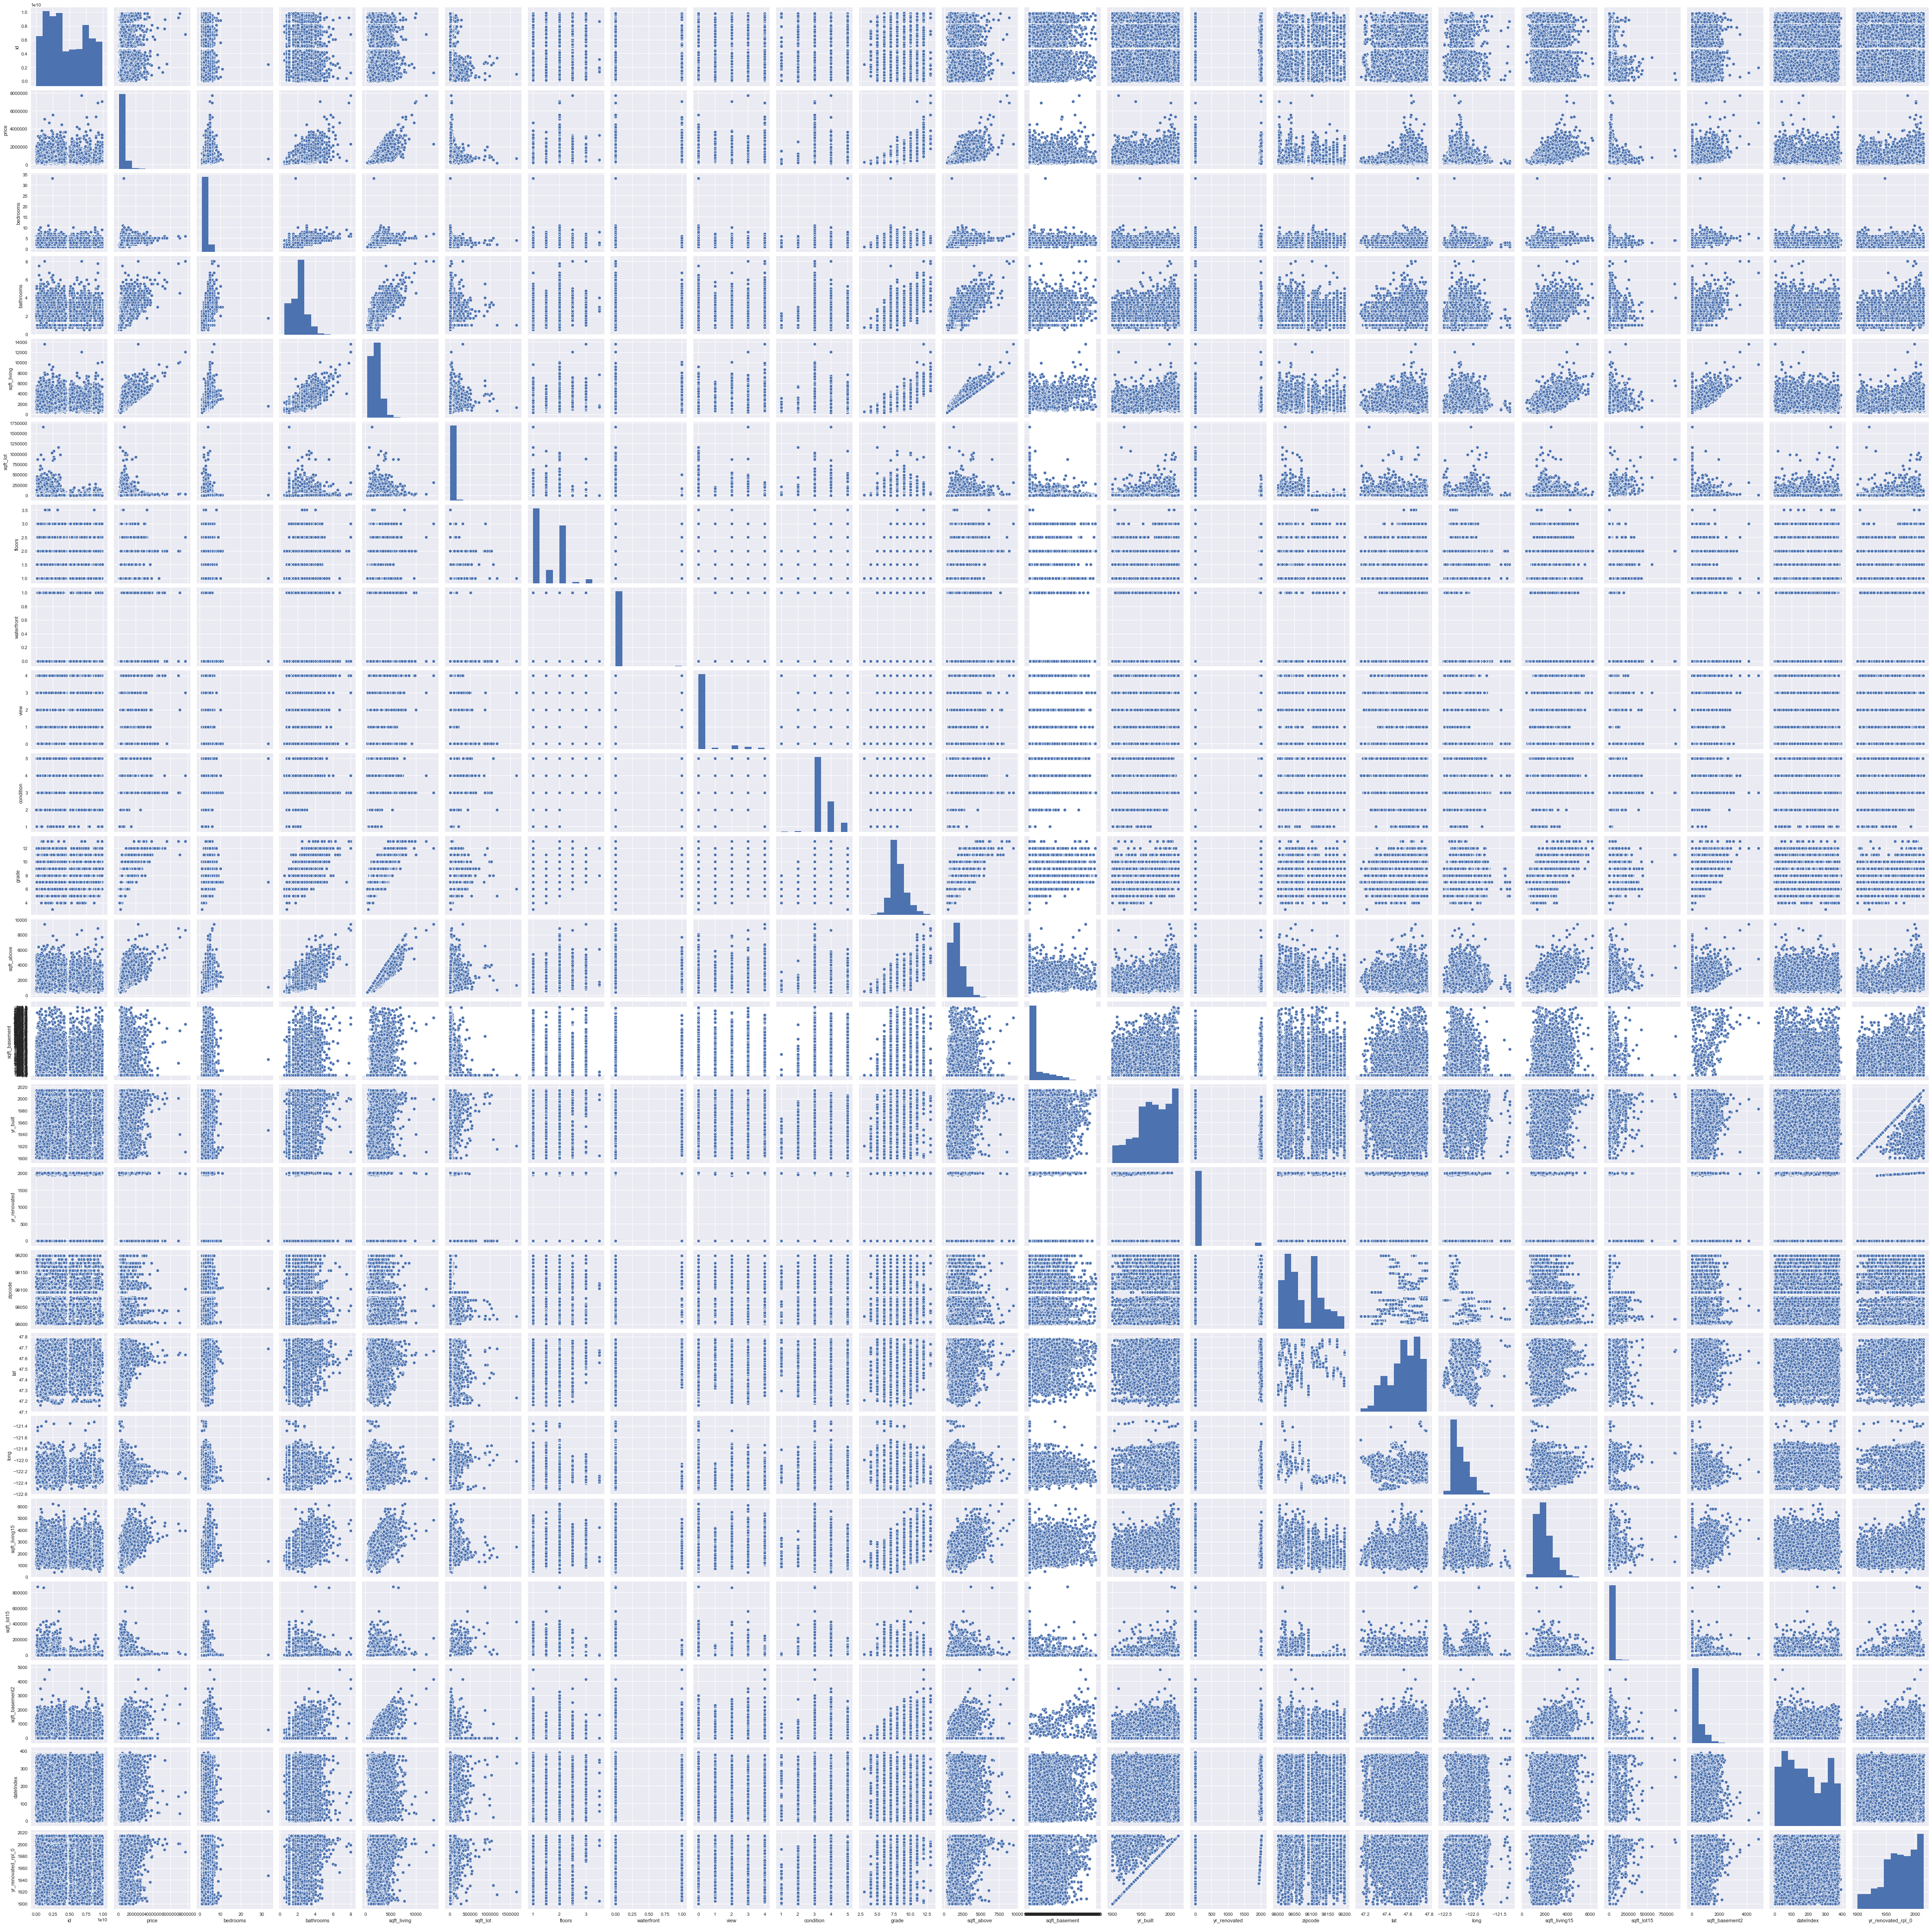

In [291]:
# daten aufteilen und verschiedene subplot machen
# object elements angucken
# unbekannte Abkützungen raussuchen
sns.pairplot(house_data)
plt.savefig('figures/pairplot.png')

## Histograms

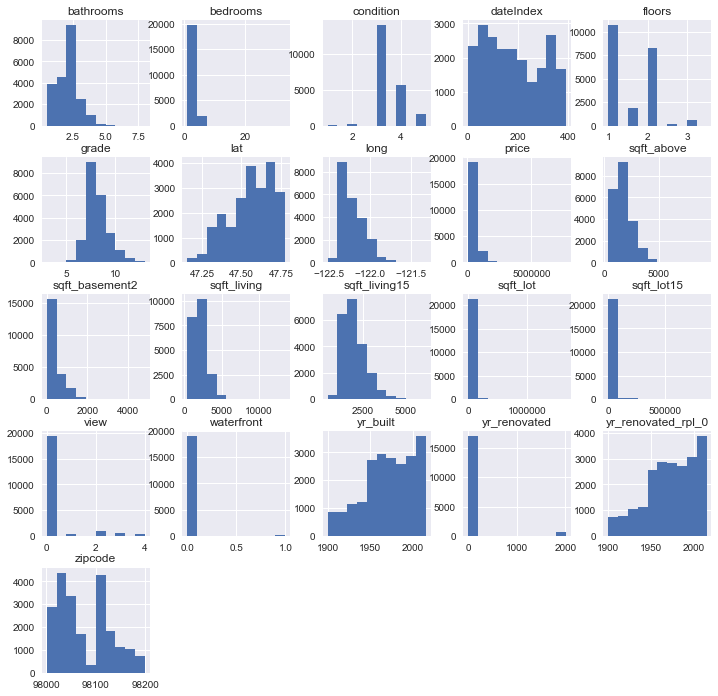

In [296]:
_ = X_dum.hist(figsize=(12,12))
plt.savefig('figures/hist_all.png')

# Individual Variables relevant for pricing

## General view

In [160]:
explanatory_vars = list(house_data.columns)
explanatory_vars = [e for e in explanatory_vars 
                   if e not in ('id','date','sqft_basement')]
explanatory_vars 

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'sqft_basement2',
 'formatted_date',
 'dateIndex']

In [161]:
print('R squared for each possible explanatory variable:' )
for explanatory_var in explanatory_vars:
    model = 'price ~ {:}'.format(explanatory_var)
    rs = smf.ols(formula=model, data=house_data).fit().rsquared
    print('{:7s} \t \t= {:.3}'.format(explanatory_var, rs))


R squared for each possible explanatory variable:
price   	 	= 1.0
bedrooms 	 	= 0.0953
bathrooms 	 	= 0.277
sqft_living 	 	= 0.493
sqft_lot 	 	= 0.00808
floors  	 	= 0.0659
waterfront 	 	= 0.0763
view    	 	= 0.157
condition 	 	= 0.0013
grade   	 	= 0.446
sqft_above 	 	= 0.366
yr_built 	 	= 0.00291
yr_renovated 	 	= 0.0168
zipcode 	 	= 0.00285
lat     	 	= 0.0941
long    	 	= 0.000486
sqft_living15 	 	= 0.343
sqft_lot15 	 	= 0.00686
sqft_basement2 	 	= 0.106
formatted_date 	 	= 0.0198
dateIndex 	 	= 1.6e-05


**highest $r^2$**
- bathrooms 	 	= 0.277
- sqft_living 	 	= 0.493
- view    	 	    = 0.157
- grade   	 	    = 0.446
- sqft_above 	 	= 0.366
- sqft_basement 	= 0.202
- sqft_living15 	= 0.343

**highest impact according to correlogram**
- sqft_living having $r^2$ = 0.493
- grade having $r^2$ = 0.446
- sqft_above having $r^2$ = 0.366
- sqft_living15 having $r^2$ = 0.343
- bathroom having $r^2$ = 0.277
- view having $r^2$ = 0.157

In [162]:
var_list  = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']
for expl_var in var_list:
    model = 'price ~ {:}'.format(expl_var)
    print(smf.ols(formula=model, data=house_data).fit().summary())
    print()
    print('**************************************************************************************')
    print()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2276.
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:06:42   Log-Likelihood:            -3.0631e+05
No. Observations:               21597   AIC:                         6.126e+05
Df Residuals:                   21595   BIC:                         6.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.272e+05   8979.293     14.166      0.0

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     63.05
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           2.12e-15
Time:                        10:06:42   Log-Likelihood:            -3.0736e+05
No. Observations:               21597   AIC:                         6.147e+05
Df Residuals:                   21595   BIC:                         6.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.896e+05   1.68e+05     -4.714      0.0

In [164]:
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_basement2',
       'formatted_date', 'dateIndex'],
      dtype='object')

## The renovation issue

In [239]:
# the pure data without NaNs
x = house_data.yr_renovated[house_data.yr_renovated >= 0.0]
x = sm.add_constant(x)
y = house_data.price[house_data.yr_renovated >= 0.0]
print(len(x))
sm.OLS(y,x).fit().summary()

17755


/Users/sandra/opt/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     303.3
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           2.32e-67
Time:                        12:39:51   Log-Likelihood:            -2.5265e+05
No. Observations:               17755   AIC:                         5.053e+05
Df Residuals:                   17753   BIC:                         5.053e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.307e+05   2807.686    188.999      0.000    5.25e+05    5.36e+05
yr_renovated   119.6688      6.872     17.415      0.000     106.200     133.138
==============================================================================
Omnibus:                    15960.413   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1018935.768
Skew:                           4.100   Prob(JB):                         0.00
Kurtosis:                      39.195   Cond. No.                         417.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [240]:
# Testing all values > 0
x = house_data.yr_renovated[house_data.yr_renovated > 0.0]
x = sm.add_constant(x)
y = house_data.price[house_data.yr_renovated > 0.0]
print(len(x))
sm.OLS(y,x).fit().summary()


744


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     11.87
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           0.000601
Time:                        12:40:43   Log-Likelihood:                -10981.
No. Observations:                 744   AIC:                         2.197e+04
Df Residuals:                     742   BIC:                         2.197e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.301e+06   2.92e+06     -3.183      0.002    -1.5e+07   -3.56e+06
yr_renovated  5045.1286   1464.139      3.446      0.001    2170.780    7919.477
==============================================================================
Omnibus:                      753.148   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46310.556
Skew:                           4.569   Prob(JB):                         0.00
Kurtosis:                      40.555   Cond. No.                     2.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

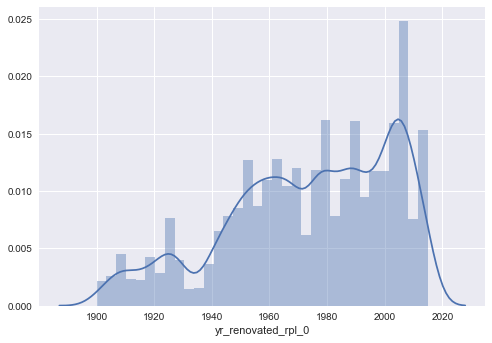

In [245]:
sns.distplot(house_data.yr_renovated_rpl_0)
plt.savefig('figures/hist_yr_renovated_rpl_0.png')

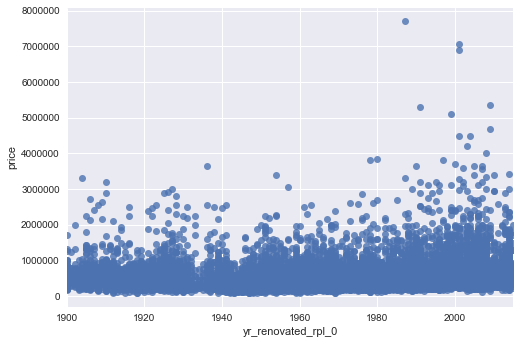

In [246]:
sns.regplot(x='yr_renovated_rpl_0',y = 'price', data= house_data)

In [249]:
smf.ols(formula='price ~ yr_renovated_rpl_0', data=house_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     190.9
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           3.34e-43
Time:                        12:51:15   Log-Likelihood:            -2.5271e+05
No. Observations:               17755   AIC:                         5.054e+05
Df Residuals:                   17753   BIC:                         5.054e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.069e+06   1.89e+05    -10.954      0.000   -2.44e+06    -1.7e+06
yr_renovated_rpl_0  1322.5837     95.718     13.818      0.000    1134.968    1510.199
==============================================================================
Omnibus:                    16130.333   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1070605.773
Skew:                           4.158   Prob(JB):                         0.00
Kurtosis:                      40.122   Cond. No.                     1.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [250]:
smf.ols(formula='price ~ yr_renovated', data=house_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     303.3
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           2.32e-67
Time:                        12:51:31   Log-Likelihood:            -2.5265e+05
No. Observations:               17755   AIC:                         5.053e+05
Df Residuals:                   17753   BIC:                         5.053e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.307e+05   2807.686    188.999      0.000    5.25e+05    5.36e+05
yr_renovated   119.6688      6.872     17.415      0.000     106.200     133.138
==============================================================================
Omnibus:                    15960.413   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1018935.768
Skew:                           4.100   Prob(JB):                         0.00
Kurtosis:                      39.195   Cond. No.                         417.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Summary:** 
- without removing 0.0 values, $r^2$ is even higher than having them removed...

## Bedrooms - the outlayer

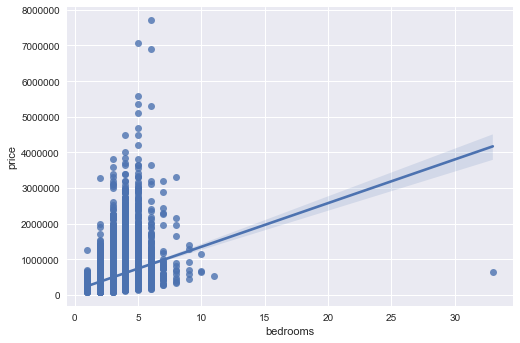

In [254]:
sns.regplot(x='bedrooms',y = 'price', data= house_data);

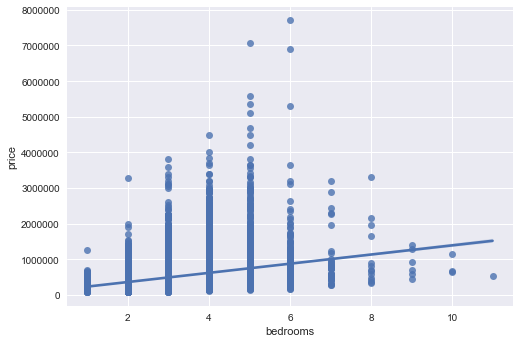

In [255]:
bedrooms_filtered = house_data.bedrooms[house_data.bedrooms <30]
price_filtered = house_data.price[house_data.bedrooms <30]
sns.regplot(x=bedrooms_filtered,y = price_filtered);

## Categories

### Grade

In [309]:
Grade_dum = pd.get_dummies(house_data.grade,prefix='Grade')
Grade_dum.head()

Grade_3  Grade_4  Grade_5  Grade_6  Grade_7  Grade_8  Grade_9  Grade_10  \
0        0        0        0        0        1        0        0         0   
1        0        0        0        0        1        0        0         0   
2        0        0        0        1        0        0        0         0   
3        0        0        0        0        1        0        0         0   
4        0        0        0        0        0        1        0         0   

   Grade_11  Grade_12  Grade_13  
0         0         0         0  
1         0         0         0  
2         0         0         0  
3         0         0         0  
4         0         0         0

In [310]:
jh_data = house_data.join(Grade_dum)

In [314]:
for item in Grade_dum:
    model = 'price ~ {:}'.format(item)
    rs = smf.ols(formula=model, data=jh_data).fit().rsquared
    print('{:7s} \t \t= {:.3}'.format(item, rs))

Grade_3 	 	= 2.66e-05
Grade_4 	 	= 0.001
Grade_5 	 	= 0.00715
Grade_6 	 	= 0.0439
Grade_7 	 	= 0.0999
Grade_8 	 	= 2.09e-05
Grade_9 	 	= 0.0556
Grade_10 	 	= 0.116
Grade_11 	 	= 0.128
Grade_12 	 	= 0.0847
Grade_13 	 	= 0.0449


### View

In [336]:
View_dum = pd.get_dummies(house_data.view,prefix='View')
View_dum.rename(columns={'View_0.0':'View_0',
                        'View_1.0':'View_1',
                        'View_2.0':'View_2',
                        'View_3.0':'View_3',
                        'View_4.0':'View_4'}, inplace=True)
jh_view_data = house_data.join(View_dum)
View_dum.head()

### rename View_0.0 in View_0 before proceeding!!!!

View_0  View_1  View_2  View_3  View_4
0       1       0       0       0       0
1       1       0       0       0       0
2       1       0       0       0       0
3       1       0       0       0       0
4       1       0       0       0       0

In [337]:
for item in View_dum:
    model = 'price ~ {:}'.format(item)
    rs = smf.ols(formula=model, data=jh_view_data).fit().rsquared
    print('{:7s} \t \t= {:.3}'.format(item, rs))

View_0  	 	= 0.125
View_1  	 	= 0.00857
View_2  	 	= 0.0217
View_3  	 	= 0.0335
View_4  	 	= 0.0918


# Multible Variable choise

In [301]:
model = 'price ~ bedrooms+ bathrooms+ sqft_living+ sqft_lot+ floors+ waterfront+ view+\
        condition+ grade+sqft_above+ yr_built+ zipcode+lat+ long+\
        sqft_living15+ sqft_lot15+sqft_basement2+dateIndex+yr_renovated_rpl_0'
smf.ols(formula=model,data=house_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2507.
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                        19:35:49   Log-Likelihood:            -2.6134e+05
No. Observations:               19164   AIC:                         5.227e+05
Df Residuals:                   19145   BIC:                         5.229e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6.801e+06   3.14e+06      2.168      0.030    6.54e+05    1.29e+07
bedrooms           -3.731e+04   2024.019    -18.431      0.000   -4.13e+04   -3.33e+04
bathrooms            4.18e+04   3495.933     11.957      0.000    3.49e+04    4.87e+04
sqft_living          113.7202      2.423     46.928      0.000     108.970     118.470
sqft_lot               0.1102      0.052      2.107      0.035       0.008       0.213
floors              7584.1967   3851.432      1.969      0.049      35.052    1.51e+04
waterfront          6.045e+05   1.85e+04     32.607      0.000    5.68e+05    6.41e+05
view                5.174e+04   2296.172     22.535      0.000    4.72e+04    5.62e+04
condition           2.847e+04   2518.521     11.304      0.000    2.35e+04    3.34e+04
grade               9.654e+04   2306.328     41.857      0.000     9.2e+04    1.01e+05
sqft_above            73.3050      2.404     30.496      0.000      68.593      78.017
yr_built           -3315.7111    137.112    -24.182      0.000   -3584.463   -3046.959
zipcode             -582.4009     35.296    -16.501      0.000    -651.584    -513.218
lat                  6.04e+05   1.15e+04     52.623      0.000    5.81e+05    6.26e+05
long               -2.137e+05    1.4e+04    -15.219      0.000   -2.41e+05   -1.86e+05
sqft_living15         18.5433      3.688      5.028      0.000      11.315      25.772
sqft_lot15            -0.3943      0.078     -5.060      0.000      -0.547      -0.242
sqft_basement2        40.4152      2.826     14.301      0.000      34.876      45.955
dateIndex            117.2541     12.983      9.031      0.000      91.805     142.703
yr_renovated_rpl_0   656.8056    140.685      4.669      0.000     381.052     932.560
==============================================================================
Omnibus:                    16403.317   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1683806.236
Skew:                           3.599   Prob(JB):                         0.00
Kurtosis:                      48.353   Cond. No.                     3.17e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.93e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [315]:
model = 'price ~ bedrooms+ bathrooms+ sqft_living+ sqft_lot+  waterfront+ view+\
        condition+ grade+sqft_above+ yr_built+ yr_renovated+ zipcode+lat+ \
        sqft_living15+ sqft_lot15'
smf.ols(formula=model,data=house_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2420.
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                        19:58:17   Log-Likelihood:            -2.1513e+05
No. Observations:               15762   AIC:                         4.303e+05
Df Residuals:                   15746   BIC:                         4.304e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.457e+06   3.43e+06      2.755      0.006    2.73e+06    1.62e+07
bedrooms      -3.739e+04   2232.737    -16.748      0.000   -4.18e+04    -3.3e+04
bathrooms      4.809e+04   3749.274     12.826      0.000    4.07e+04    5.54e+04
sqft_living     156.9165      4.950     31.703      0.000     147.215     166.618
sqft_lot          0.0345      0.056      0.611      0.541      -0.076       0.145
waterfront     6.159e+05   2.07e+04     29.794      0.000    5.75e+05    6.56e+05
view           5.461e+04   2564.940     21.291      0.000    4.96e+04    5.96e+04
condition      2.587e+04   2798.364      9.243      0.000    2.04e+04    3.14e+04
grade          9.999e+04   2540.566     39.358      0.000     9.5e+04    1.05e+05
sqft_above       30.5587      4.578      6.676      0.000      21.586      39.532
yr_built      -2929.3894     82.258    -35.612      0.000   -3090.624   -2768.155
yr_renovated     17.8786      4.388      4.074      0.000       9.277      26.480
zipcode        -332.7308     35.364     -9.409      0.000    -402.049    -263.413
lat            5.941e+05   1.27e+04     46.758      0.000    5.69e+05    6.19e+05
sqft_living15     5.2506      4.045      1.298      0.194      -2.679      13.180
sqft_lot15       -0.4408      0.085     -5.198      0.000      -0.607      -0.275
==============================================================================
Omnibus:                    13823.846   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1500582.184
Skew:                           3.729   Prob(JB):                         0.00
Kurtosis:                      50.215   Cond. No.                     2.12e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [328]:
model = 'price ~ bedrooms+ bathrooms+ sqft_living+ sqft_lot+ floors+ waterfront+ view+\
        condition+ Grade_7+Grade_10+Grade_11+Grade_12+sqft_above+ yr_built+ zipcode+lat+ long+\
        sqft_living15+ sqft_lot15+sqft_basement2+dateIndex+yr_renovated_rpl_0'
smf.ols(formula=model,data=jh_data).fit().rsquared

0.7034965373498598

In [339]:
model = 'price ~ bedrooms+ bathrooms+ sqft_living+ sqft_lot+ floors+ waterfront+ View_0+\
        condition+ grade+sqft_above+ yr_built+ zipcode+lat+ long+\
        sqft_living15+ sqft_lot15+sqft_basement2+dateIndex+yr_renovated_rpl_0'
smf.ols(formula=model,data=jh_view_data).fit().rsquared

0.7006275825810508

In [341]:
model = 'price ~ sqft_above+ bathrooms+ view+sqft_living'
smf.ols(formula=model,data=house_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     6190.
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:14:51   Log-Likelihood:            -2.9817e+05
No. Observations:               21534   AIC:                         5.964e+05
Df Residuals:                   21529   BIC:                         5.964e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.788e+04   5040.353     -3.547      0.000   -2.78e+04   -7998.043
sqft_above     16.1005      4.349      3.702      0.000       7.576      24.625
bathrooms     167.2989   3388.924      0.049      0.961   -6475.243    6809.841
view         1.042e+05   2354.302     44.243      0.000    9.95e+04    1.09e+05
sqft_living   242.5321      4.458     54.401      0.000     233.794     251.271
==============================================================================
Omnibus:                    14058.995   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           535540.549
Skew:                           2.605   Prob(JB):                         0.00
Kurtosis:                      26.869   Cond. No.                     9.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Test